# Linear Regression

## Agenda

1. Introducing the simple linear regression dataset
    - Reading in the data
    - Normalizing the data
    - Visualizing the data
2. Linear regression basics
    - Form of linear regression
    - Building a linear regression model using analytical solution
    - Building a linear regression model using gradient descent
    - Building a linear regression model using Python libraries
3. Working with multiple features
    - Visualizing the data (part 2)
    - Building a multiple linear regression model using Python libraries
    - Feature analysis using correlation matrix and Heatmap
    - Feature analysis using Error

## Reading in the data

In [1]:
# read the data
import pandas as pd
url = 'dollar.csv'
dollar_price = pd.read_csv(url, index_col=False)

In [2]:
dollar_price.head()

,Year,Price,GDP_saving
0,1981,12,25.369588
1,1982,14,25.609109
2,1983,14,30.431486
3,1984,16,26.927835
4,1985,17,23.985667


**Questions:**

- What does each observation represent?
- What is the response variable ?
- How many features are there?
- How to normalize features ?

# Data Normalization

In order to normalize data; take maximum and min value against every input feature.

If feature x has range -100 to 100, then 
min(x) = -100 and max(x) = 100

**In order to normalize x = 94:**

 $x' = \frac{94 - (-100)}{100 - (-100)}$
 
 $x' = \frac{94 + 100}{100 + 100}$
 
 $x' = \frac{194}{200}$
 
 $x' = 0.97$
 
 
 This form of normalization is called Min-max Normalization. It maps maximum value to 1 and minimum value to zero
 
 In previous example: **with minimum value of x= -100**
 
 $x' = \frac{-100 - (-100)}{100 - (-100)}$
 
 $x' = \frac{-100 + 100}{100 + 100}$
 
 $x' = \frac{0}{200}$
 
 $x' = 0$
 
 
 **for x = 100 (maximum value) **
 
 $x' = \frac{100 - (-100)}{100 - (-100)}$
 
 $x' = \frac{100 + 100}{100 + 100}$
 
 $x' = \frac{200}{200}$
 
 $x' = 1$
 
 There exist mean, variance and standard deviation based normalization strategies as well. You can explore them as your homework.


In [3]:
import numpy as np
def normalize(list, max_, min_):
    #min_ = min(list)* 1.0
    #max_ = max(list)* 1.0
    return [(i-min_)/(max_-min_) for i in list]

max_x = max(dollar_price.Year)  * 1.0
min_x = min(dollar_price.Year)  * 1.0
max_y = max(dollar_price.Price) * 1.0
min_y = min(dollar_price.Price) * 1.0

x = np.asarray(normalize(dollar_price.Year, max_x, min_x))
y = np.asarray(normalize(dollar_price.Price, max_y, min_y))


## Visualizing the data

After data normalization, we can plot the values to visualize the relation between variables.

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

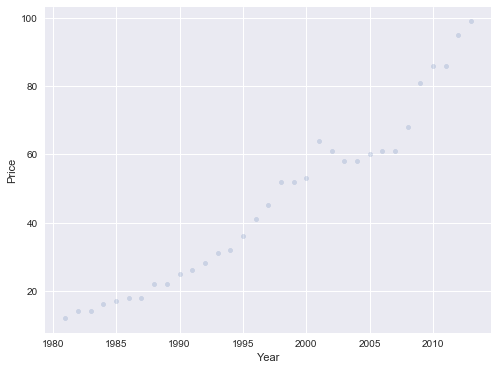

In [7]:
# Pandas scatter plot
dollar_price.plot(kind='scatter', x='Year', y='Price', alpha=0.2)

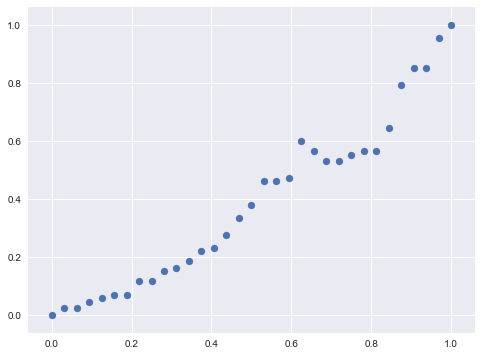

In [11]:
# plot of normalized values
plt.scatter(x, y)
plt.show()

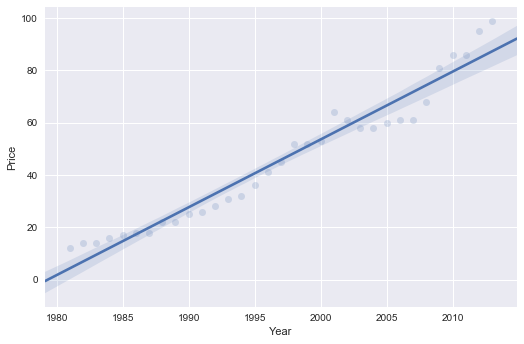

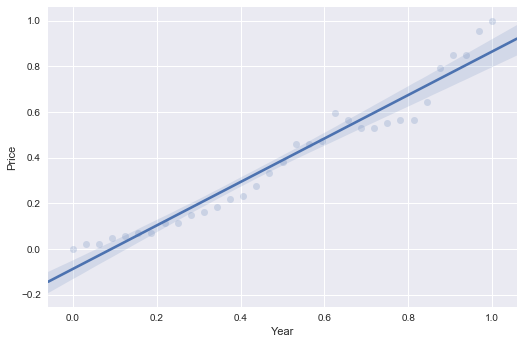

In [12]:
# Seaborn scatter plot with regression line
sns.lmplot(x='Year', y='Price', data=dollar_price, aspect=1.5, scatter_kws={'alpha':0.2})

norm_dollar = pd.DataFrame(
    {'Year': x,
     'Price': y })
sns.lmplot(x='Year', y='Price', data=norm_dollar, aspect=1.5, scatter_kws={'alpha':0.2})


## Form of linear regression

$y = w_0 + w_1x_1 + w_2x_2 + ... + w_nx_n$

- $y$ is the response
- $w_0$ is the intercept
- $w_1$ is the coefficient for $x_1$ (the first feature)
- $w_n$ is the coefficient for $x_n$ (the nth feature)

The $w$ values are called the **model coefficients**:

- These values are estimated (or "learned") during the model fitting process using the **least squares criterion**.
- Specifically, we are find the line (mathematically) which minimizes the **sum of squared residuals** (or "sum of squared errors").
- And once we've learned these coefficients, we can use the model to predict the response.

![Estimating coefficients](images/estimating_coefficients.png)

In the diagram above:

- The black dots are the **observed values** of x and y.
- The blue line is our **least squares line**.

## Building a linear regression model using Analyical Solution

# In analytical solution, 

we derived $ŵ_𝟎= \bar{y} − ŵ_𝟏 * \bar{x}$

Similarly $\hat{w_1} = \frac{ \sum_{i=1}^n x_i y_i - n \bar{y} \bar{x} }{\sum_{i=1}^n x_i^2  - n \bar{x}^2 }$


    

In [13]:
# calculating squares
def square(list):
    return [i ** 2 for i in list]

square_x = square(x)
sum_X2 = sum(square_x)
sum_x = sum(x)
sum_y = sum(y)
n = len(y)
avg_x = sum_x/n
avg_y = sum_y/n
sum_XY = 0
c = 0

for i in x:
    sum_XY += i * y[c]
    c+=1

w1 = (sum_XY - n * avg_x * avg_y)/ (sum_X2 - n * avg_x * avg_x)
w0 = avg_y - w1 * avg_x 

print("w1 = {0}, w0 = {1}". format(w0, w1))


w1 = -0.0878972278567, w0 = 0.953223922798


# Using Gradient Descent method 

Gradient function for both paramters are given as following:

$\frac{\partial Error}{\partial \hat{w_0}} = 2 * \sum_{i=1}^n (y_i - \hat{y_i}) (-1)$


$\frac{\partial Error}{\partial \hat{w_1}} = 2 * \sum_{i=1}^n (y_i - \hat{y_i}) (- x_i)$


In [26]:
#Gradient descent algorithm for linear regression
from numpy import *

# minimize the "sum of squared errors". 
def compute_error_for_line_given_points (w0,w1,x, y):
    totalError = 0 	#sum of square error formula
    for i in range (0, len(y)):
        x_i = x[i]
        y_i = y[i]
        error = (y_i - (w0 + w1 *x_i)) ** 2
        totalError += error
    return totalError/ float(len(y))

def step_gradient (w0_current, w1_current, x , y, learning_rate):
    #gradient descent
    w0_gradient = 0
    w1_gradient = 0
    N = float(len(y))
    for i in range (0, len(y)):
        x_i = x[i]
        y_i = y[i]
        w0_gradient += -(2) * (y_i - (w1_current * x_i + w0_current))
        w1_gradient += -(2) * x_i * (y_i - (w1_current * x_i + w0_current))
    new_w0 = w0_current - (learning_rate * w0_gradient/N)
    new_w1 = w1_current - (learning_rate * w1_gradient/N) 
    return [new_w0,new_w1]

def gradient_descent_runner(x , y, starting_w0, starting_w1, learning_rate, num_iteartions):
    w0 = starting_w0
    w1 = starting_w1
    for i in range(num_iteartions):
        w0,w1 = step_gradient(w0, w1, x , y, learning_rate)
    return [w0,w1]


#Step 1: Define Hyperparameters (Parameters required in models  )
learning_rate = 0.01    # how fast the data converge
initial_w0 = 0
initial_w1 = 0 
num_iterations = 10000
print("Starting gradient descent at w0 = {0}, w1 = {1}, error = {2}".format(initial_w0, initial_w1, compute_error_for_line_given_points(initial_w0, initial_w1, x , y)))
print("Running...")
[w0, w1] = gradient_descent_runner(x , y, initial_w0, initial_w1, learning_rate, num_iterations)
print("After {0} iterations w0 = {1}, w1 = {2}, error = {3}".format(num_iterations, w0, w1, compute_error_for_line_given_points(w0, w1, x , y)))




Starting gradient descent at w0 = 0, w1 = 0, error = 0.235570128555
Running...
After 10000 iterations w0 = -0.0878968692847, w1 = 0.953223255701, error = 0.00401885219588


# Linear Regression using Python packages

Here we have used Python libaries named scikit to perform linear regression

In [35]:
# import, instantiate, fit
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(x.reshape(-1,1), y)

AttributeError: 'DataFrame' object has no attribute 'reshape'

In [ ]:
# print the coefficients
print (linreg.intercept_)
print (linreg.coef_)

Interpreting the **intercept** ($\hat{w_0}$):

- It is the value of $y$ when $x$=0.
- Thus, it is the estimated number of dollar price when the year is zero (in normalized terms).
- **Note:** It does not always make sense to interpret the intercept. (Why?)

Interpreting the **"price" coefficient** ($\hat{w_1}$):

- It is the change in $y$ divided by change in $x$, or the "slope".
- Thus, a year increase  is **associated with** a dollar price increase of 0.95 points.
- This is not a statement of causation.
- $\hat{w_1}$: would be **negative** if an increase in year was associated with a **decrease** in dollar price.

# Multiple Linear Regression

It is applied when there exist multiple input features. 
For this task, we'll be working with a dataset from Capital Bikeshare that was used in a Kaggle competition ([data dictionary](https://www.kaggle.com/c/bike-sharing-demand/data)).


In [36]:
import pandas as pd
url = 'train.csv'
bikes = pd.read_csv(url, index_col='datetime', parse_dates=True)

In [37]:
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


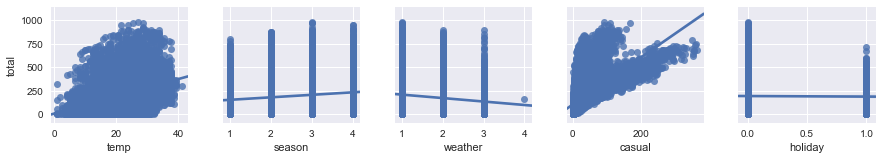

In [38]:
# "count" is a method, so it's best to name that column something else
bikes.rename(columns={'count':'total'}, inplace=True)

feature_cols = ['temp', 'season', 'weather', 'casual', 'holiday']
# multiple scatter plots in Seaborn
sns.pairplot(bikes, x_vars=feature_cols, y_vars='total', kind='reg') 


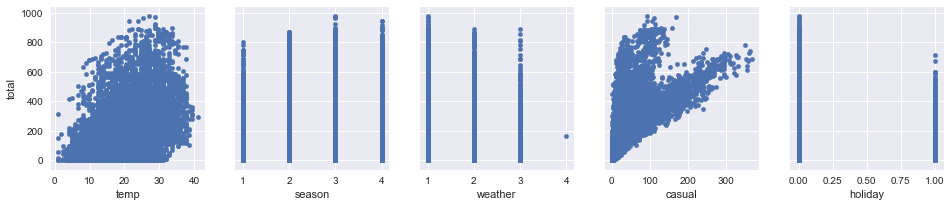

In [39]:

# multiple scatter plots in Pandas
fig, axs = plt.subplots(1, len(feature_cols), sharey=True)
for index, feature in enumerate(feature_cols):
    bikes.plot(kind='scatter', x=feature, y='total', ax=axs[index], figsize=(16, 3))

In [40]:
    # create X and y
x = bikes[feature_cols]
y = bikes.total

# instantiate and fit
linreg = LinearRegression()
linreg.fit(x, y)

# print the coefficients
print linreg.intercept_
print linreg.coef_


57.0617970793
[  1.59069604  13.72563428 -10.86003081   2.34479218 -39.67663493]


What does this tell us?

There are more rentals in the winter than the spring, but only because the system is experiencing **overall growth** and the winter months happen to come after the spring months.

In [41]:
# correlation matrix (ranges from 1 to -1)
bikes.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


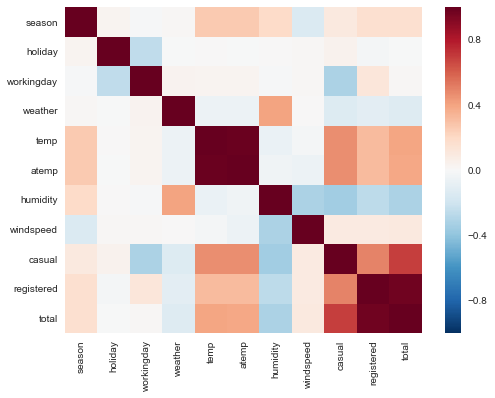

In [42]:
# visualize correlation matrix in Seaborn using a heatmap
sns.heatmap(bikes.corr())

# Heatmap

Heatmap is alternate way to analyze the correlation between various attributes. Here blue color shows negative correlation whereas red color shows positive correlation. 

## Adding more features to the model

In the light of insights learnt from heatmap i.e. correlation matrix, one can update the model parameters.

In [43]:
# create a list of features
feature_cols = ['temp', 'season', 'weather', 'humidity', 'holiday'] #, 'holiday', 'casual']

In [44]:
# create X and y
X = bikes[feature_cols]
y = bikes.total

print(X.shape)
# instantiate and fit
linreg = LinearRegression()
linreg.fit(X, y)

# print the coefficients
print linreg.intercept_
print linreg.coef_

(10886, 5)
159.74875345
[  7.86309353  22.58429941   6.65255507  -3.11902562  -9.54182463]


# Feature analysis using Error

Here, a generic function is provided to calculate the error using header information and input. Using this fucntion, we can analyze which features help in improving model accuracy on training dataset.


In [46]:
# pair the feature names with the coefficients
zip(feature_cols, linreg.coef_)

def calculateError(X, y, bias, coef, cols):
    error = 0
    c = 0
    pdList = list()
    for entry in cols:
        tmp = list(X[entry].tolist())
        pdList.append(tmp)
    
    final = list(map(list, zip(*pdList)))
    
    for entry in final:
        output = bias
        for i in range(0, len(entry)):
            #print("Entry {0}, coef {1}   i {2}".format(entry[i], coef[i] , i))
            output += entry[i] * coef[i]
        error+= (y[c] - output) ** 2
        c+=1
    return sqrt(error)   
            
e = calculateError(X, y, linreg.intercept_, linreg.coef_, feature_cols)
print("Error : {0}".format(e))

Error : 16275.3965791
